Import Libraries

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk

import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

Data loading. Note: ISO-8859-1 is latin1 encoding, however i used ISO standard as it is also supported on linux. LAtin1 does not work in WSL2

In [102]:
df = pd.read_csv("spam.csv",encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [103]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [104]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Visualisation for detecting ratio. Quite unbalanced

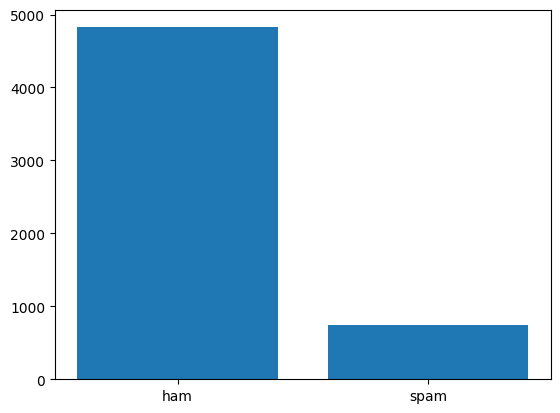

In [105]:
hamspam = df['v1'].value_counts()
hamspam = pd.Series.to_dict(hamspam)

def plotter(dictionary):
    dictionaryX = list(dictionary.keys())
    dictionaryY = list(dictionary.values())

    plt.bar(dictionaryX,dictionaryY)

plotter(hamspam)

We cannot apply stemming as messages usew a lot of abbreviations and local contexts: eg - before=B4, wyd = what you doing, ouu is just a way of emphasizing with OH, and so on

In [106]:
stopw = nltk.corpus.stopwords.words()

def preprocess(txt):
    txt = txt.lower()
    txt = ''.join([i for i in txt if i not in string.punctuation])
    # txt = nltk.word_tokenize(txt)
    # txt = ''.join([i for i in txt if i not in stopw])
    
    return txt

In [107]:
df['v2'] = df['v2'].apply(preprocess)
df.head()

,v1,v2
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


In [108]:
X_train,X_test, y_train, y_test = train_test_split(df.v2, df.v1, test_size=0.2, shuffle=True)

Create classifiewrs with a pipeline. This pipe line laso has tfidf and count vectorizer that will be applied directly while fitting the model. Saves memory

In [109]:
NB_classifier = MultinomialNB()
nbpipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

NBmodel = nbpipe.fit(X_train, y_train)
print(NBmodel.score(X_train,y_train))
print(NBmodel.score(X_test,y_test))

print(classification_report(y_pred=NBmodel.predict(X_test), y_true=y_test))

0.96881310298407
0.9417040358744395
              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       955
        spam       1.00      0.59      0.75       160

    accuracy                           0.94      1115
   macro avg       0.97      0.80      0.86      1115
weighted avg       0.95      0.94      0.94      1115



In [111]:
LR_classifier = LogisticRegression()
lrpipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LR_classifier)])

LRModel = lrpipe.fit(X_train, y_train)
print(LRModel.score(X_train,y_train))
print(LRModel.score(X_test,y_test))

print(classification_report(y_pred=LRModel.predict(X_test), y_true=y_test))

0.9712811308054745
0.9659192825112107
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       955
        spam       1.00      0.76      0.87       160

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [112]:
DT_classifer = DecisionTreeClassifier()
dtpipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DT_classifer)])

DTmodel = dtpipe.fit(X_train, y_train)
print(DTmodel.score(X_train,y_train))
print(DTmodel.score(X_test,y_test))

print(classification_report(y_pred=DTmodel.predict(X_test), y_true=y_test))

1.0
0.9605381165919282
              precision    recall  f1-score   support

         ham       0.97      0.99      0.98       955
        spam       0.90      0.81      0.86       160

    accuracy                           0.96      1115
   macro avg       0.94      0.90      0.92      1115
weighted avg       0.96      0.96      0.96      1115



In [113]:
RF_classifier = RandomForestClassifier()
rfpipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RF_classifier)])

RFmodel = rfpipe.fit(X_train, y_train)
print(RFmodel.score(X_train,y_train))
print(RFmodel.score(X_test,y_test))

print(classification_report(y_pred=RFmodel.predict(X_test), y_true=y_test))

1.0
0.967713004484305
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       955
        spam       1.00      0.78      0.87       160

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [114]:
SVM_classifier = SVC()
svmpipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SVM_classifier)])

SVMmodel = svmpipe.fit(X_train, y_train)
print(SVMmodel.score(X_train,y_train))
print(SVMmodel.score(X_test,y_test))

print(classification_report(y_pred=SVMmodel.predict(X_test), y_true=y_test))

0.9977563383441777
0.979372197309417
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       955
        spam       1.00      0.86      0.92       160

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [117]:
GB_classifier = GradientBoostingClassifier()
gbpipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GB_classifier)])

GBmodel = gbpipe.fit(X_train, y_train)
print(GBmodel.score(X_train,y_train))
print(GBmodel.score(X_test,y_test))

print(classification_report(y_pred=GBmodel.predict(X_test), y_true=y_test))

0.980480143594346
0.9605381165919282
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       955
        spam       0.98      0.74      0.84       160

    accuracy                           0.96      1115
   macro avg       0.97      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115

